# Persian Literature Analytics

We are trying to answer an interesting question: How Persian poet though?

We are trying to answer this queston by seeing, what are the most commo word in thei writings?
Based on that, we can draw a picture from the world that they lived in.

We focus on 5 most influential poets in Persian Literature:


**1- [``Rumi``](https://en.wikipedia.org/wiki/Rumi)**

**2- [``Ferdowsi``](https://en.wikipedia.org/wiki/Ferdowsi)**

**3- [``Sadi``](https://en.wikipedia.org/wiki/Saadi_Shirazi)**

**4- [``Hafez``](https://en.wikipedia.org/wiki/Hafez)**

**5- [``Khayyam``](https://en.wikipedia.org/wiki/Omar_Khayyam)**


Moreover, we also are going to concatanate all of the poems from all of the poets available in [Ganjoor](ganjoor.net) website and perform a single analytics on all of those books and see in total, how was the world of this group of people.

Note: this notebook is best enjoyed by native Persian speakers. However, we tried to explain the important words in English, too.

## Web Scrapping

Please refer to [this](https://github.com/amnghd/NLP_Tour_on_Persian_Literature) code on this repository to see how we used BeautifulSoup and Requests packages to (ethically) crawl all of the Ganjoor website.

To summarize, in that code we have:

1- A poet scrapper, which recursively check the available poets on the website, and sees if it is already scraped.

2- A daftar scrapper, which recursively checks all the books and the chapters of each peot

3- A beyt scrapper, which recursively checks each line of poem (called beyt) and append them to the list,

4- FileIO routine that exports the txt file to the output.

## Analytics on Poets

In [3]:
# installing required paclages (uncomments the last three lines)
# for using natural language processing funtions
# for using python for arabic (persian) alphabet
# for reshaping words to arabic style (from left to right)


#!pip install nltk 
#!pip install python-bidi 
#!pip install arabic-reshaper 

In [14]:
import nltk
import re
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg
import arabic_reshaper
import numpy as np
%matplotlib inline

In [25]:
#utility function

def is_float(string):
    try:
        return float(string) and '.' in string  # True if string is a number contains a dot
    except ValueError:  # String is not a number
        return False

def book_importer(file_name): # to import the books as a text file
    with open(file_name, 'r', encoding="utf8") as myfile:
        line = myfile.read().replace('\n', ' ').replace(",","").replace(":","").replace("ۀ","ه").replace("-","").replace("،","")
        word_list = re.split('[\t\s:]+', line)   # a list of words inside the book
    return word_list

def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words
    
def stop_word_remover(word_list, stop_words):
    cleaned_words = [x for x in word_list if x not in stop_words] # no stop word is in it
    return cleaned_words
    
def do_plot(cleaned_words, poet_name):
    freqdist = nltk.FreqDist(cleaned_words)
    freq_dict = list(zip(freqdist.keys(), freqdist.values()))
    freq_dict.sort(key=lambda x: x[1], reverse=True)
    freq_dict = freq_dict[:45]
    labels = [x[0] for x in freq_dict]
    ticks = [bidialg.get_display(arabic_reshaper.reshape (x)) for x in labels]
    values = [x[1] for x in freq_dict]
    index = np.arange(len(values))
    color =['gold']*5+['orange']*15+['silver']*(len(index)-20)
    fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.title(bidialg.get_display(arabic_reshaper.reshape (' نمودار بسامد لغات در اشعار'+poet_name)))
    plt.xlabel(bidialg.get_display(arabic_reshaper.reshape ('لغات')))
    plt.ylabel(bidialg.get_display(arabic_reshaper.reshape ('تعداد تکرار')))
    plt.bar(index, values, color=color)
    plt.xticks(index,ticks, rotation=60)
    plt.show()
    
def do_them_all(book_file,stop_word_file, poet_name):
    word_list = book_importer(book_file)
    stop_words = stop_word_importer(stop_word_file)
    cleaned_words = stop_word_remover(word_list, stop_words)
    do_plot(cleaned_words, poet_name)

# Poet \#1: Rumi

Let's perform NLP analysis on Rumi's two most important books, Masnavi, and Shams.

Here is a brief background of Rumi:

Jalāl ad-Dīn Muhammad Rūmī (Persian: جلال‌الدین محمد رومی‎), also known as Jalāl ad-Dīn Muhammad Balkhī (جلال‌الدین محمد بلخى), Mevlânâ/Mawlānā (مولانا, "our master"), Mevlevî/Mawlawī (مولوی, "my master"), and more popularly simply as Rumi (30 September 1207 – 17 December 1273), was a 13th-century Persian Sunni Muslim poet, jurist, Islamic scholar, theologian, and Sufi mystic. Rumi's influence transcends national borders and ethnic divisions: Iranians, Tajiks, Turks, Greeks, Pashtuns, other Central Asian Muslims, and the Muslims of South Asia have greatly appreciated his spiritual legacy for the past seven centuries. His poems have been widely translated into many of the world's languages and transposed into various formats. Rumi has been described as the "most popular poet"and the "best selling poet" in the United States.

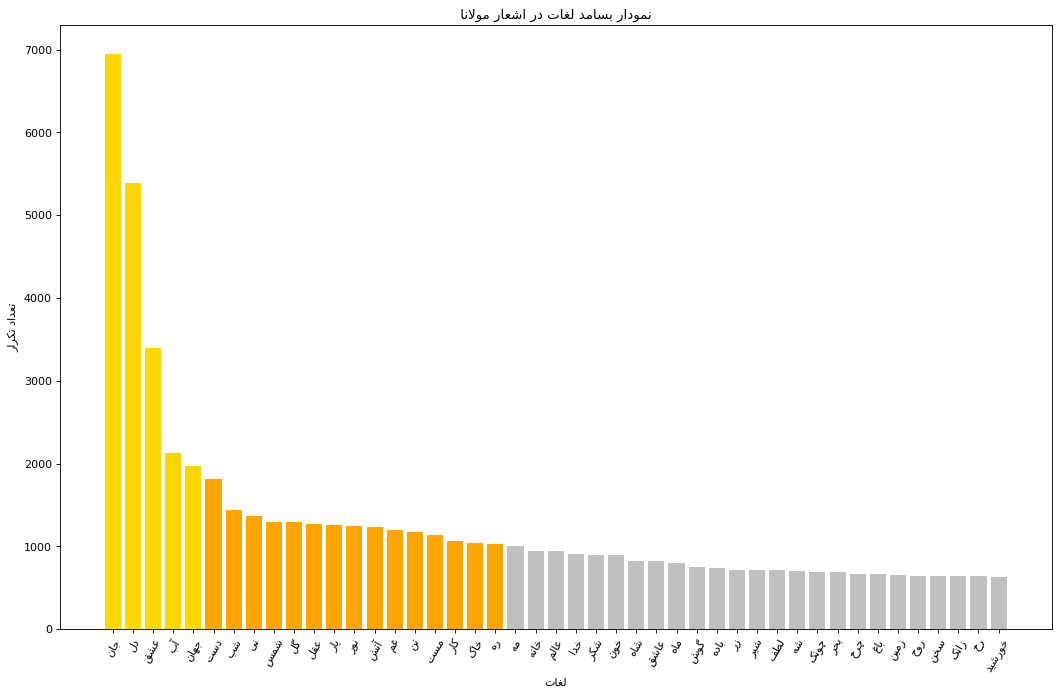

In [28]:
do_them_all('moulavi.txt','stop_words.txt', ' مولانا ')

The five first most frequent words in Rumi's poems are:

``Spirit``: repeated more than 7000 times

``Heart``: repeated more than 5400 times

``Love``: repeated around 3300 times

``Water``: repeated around 2100 times

``World``: repeated around 2000 tmes



** One would say that world of Rumi is world of ``love``**

# Poet \#2 Ferdowsi

Let's perform NLP analysis on Ferdosi's poems.

Here is a brief background of Ferdosi:

Abu ʾl-Qasim Ferdowsi Tusi (c. 940–1020), or Ferdowsi (also transliterated as Firdawsi, Firdusi, Firdosi, Firdausi) was a Persian poet and the author of Shahnameh ("Book of Kings"), which is the world's longest epic poem created by a single poet, and the national epic of Greater Iran. Ferdowsi is celebrated as the most influential figure in Persian literature and one of the greatest in the history of literature. He was called "the Lord of the Word" and "the Savior of the Persian Language".

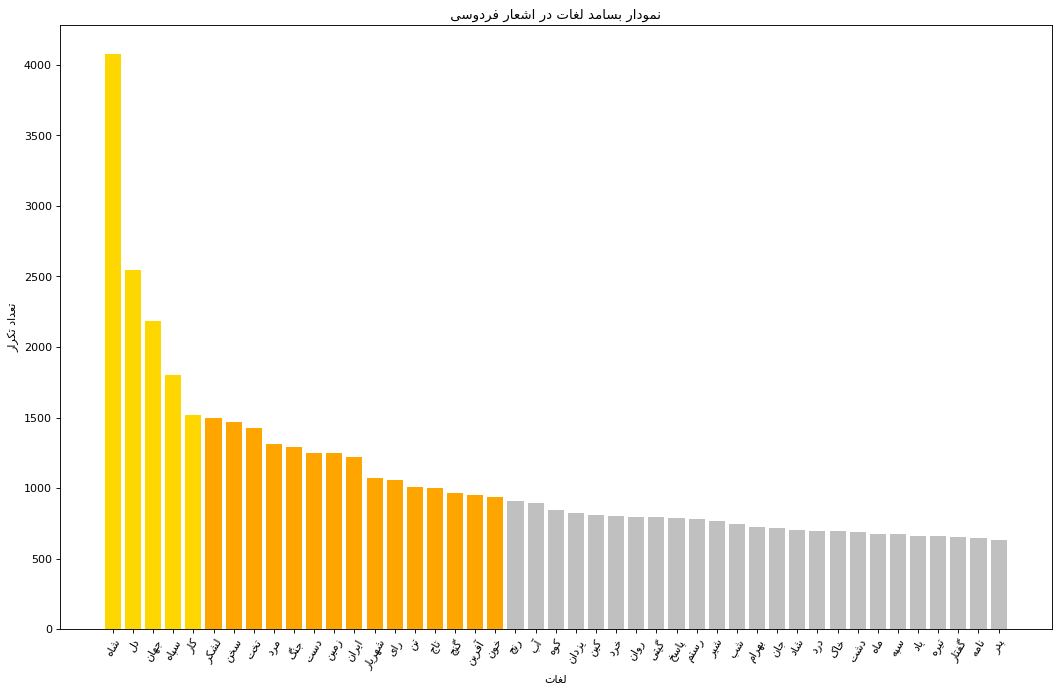

In [29]:
do_them_all('ferdousi.txt','stop_words.txt', ' فردوسی ')

The five first most frequent words in Ferowsi's poems are:

``King``: repeated more than 4000 times

``Heart``: repeated more than 2550 times

``World``: repeated around 2200 times

``Army``: repeated around 1700 times

``Action``: repeated around 1500 times



**One would say that world of Ferdowsi is ``world of war``. **

# Poet \# 3: Sadi

Let's perform NLP analysis on Sadi's poems.

Here is a brief background of Ferdosi:
    
Abū-Muhammad Muslih al-Dīn bin Abdallāh Shīrāzī(Persian: ابومحمد مصلح‌الدین بن عبدالله شیرازی‎), better known by his pen-name Saadi (سعدی Saʿdī(About this sound Sa'di (help·info))), also known as Saadi of Shiraz (سعدی شیرازی Saadi Shirazi), was a major Persian poet and literary of the medieval period. He is recognized for the quality of his writings and for the depth of his social and moral thoughts. Saadi is widely recognized as one of the greatest poets of the classical literary tradition, earning him the nickname "Master of Speech" (استاد سخن) or "The Master" among Persian scholars. He has been quoted in the Western traditions as well.

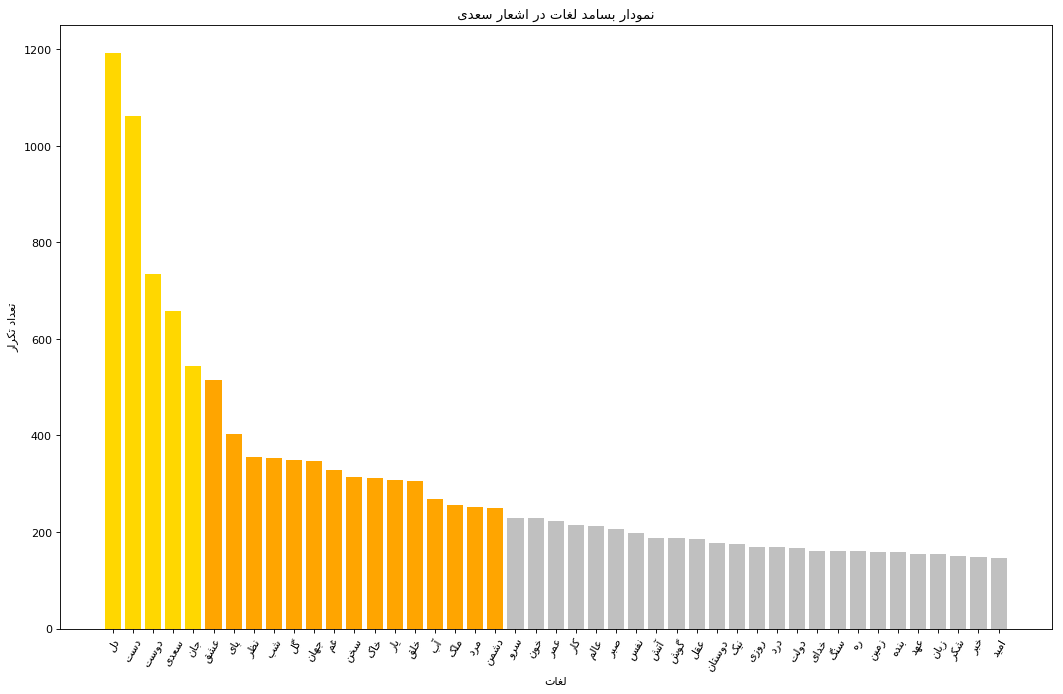

In [30]:
do_them_all('saadi.txt','stop_words.txt', ' سعدی ')

The five first most frequent words in Sadi's poems are:

``Heart``: repeated more than 1200 times

``Hand``: repeated more than 1100 times

``Friend``: repeated around 700 times

``Sadi``: repeated around 650 times

``Spirit``: repeated around 550 times

**One would say that the world of Sadi is the world of ``friendship``.**

# Poet \# 4: Hafiz

Let's perform NLP analysis on Hafiz's poems.


Khwāja Shams-ud-Dīn Muḥammad Ḥāfeẓ-e Shīrāzī (Persian: خواجه شمس‌‌الدین محمد حافظ شیرازی‎), known by his pen name Hafez (حافظ Ḥāfeẓ 'the memorizer; the (safe) keeper'; 1315-1390) and as "Hafiz", was a Persian poet who "lauded the joys of love and wine but also targeted religious hypocrisy." His collected works are regarded as a pinnacle of Persian literature and are often found in the homes of people in the Persian speaking world, who learn his poems by heart and still use them as proverbs and sayings. His life and poems have been the subject of much analysis, commentary and interpretation, influencing post-14th century Persian writing more than any other author.

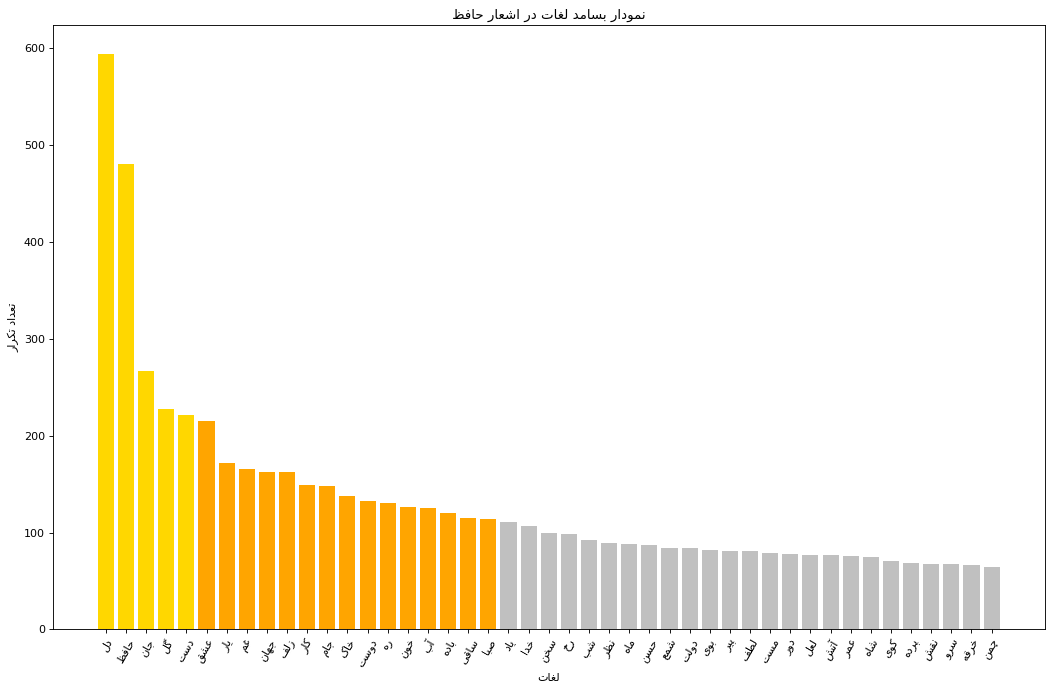

In [31]:
do_them_all('hafez.txt','stop_words.txt', ' حافظ ')

The five first most frequent words in Hafiz 's poems are:

``Heart``: repeated around  600 times

``Hafiz``: repeated more than 450 times

``Spirit``: repeated around 270 times

``Flower``: repeated around 220 times

``Hand``: repeated around 220 times

**One would say that the world of Hafiz is the world of an earthly ``love``.**

# Poet \# 5: Khayyam

Let's perform NLP analysis on Khayyam's poems.

Omar Khayyam (Persian pronunciation: [xæjˈjɑːm]; عمر خیّام  (Persian); 18 May 1048 – 4 December 1131) was a Persian mathematician, astronomer, and poet.

As a mathematician, he is most notable for his work on the classification and solution of cubic equations, where he provided geometric solutions by the intersection of conics. As an astronomer, he composed a calendar which proved to be a more accurate computation of time than that proposed five centuries later by Pope Gregory XIII.

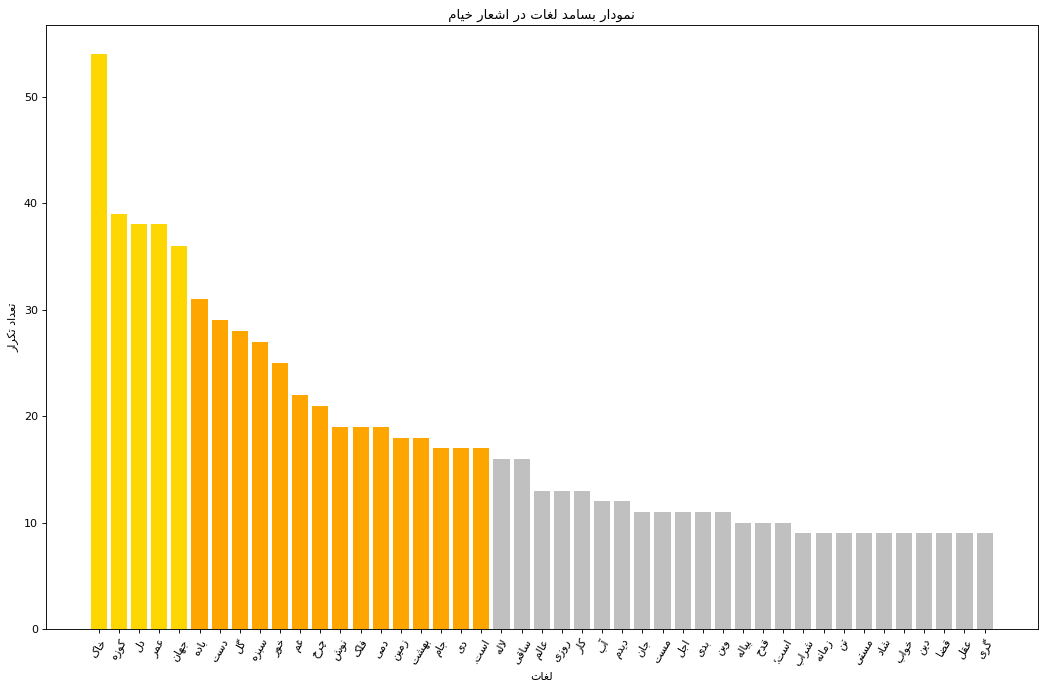

In [35]:
do_them_all('khayyam.txt','stop_words.txt', ' خیام ')

The five first most frequent words in Khayyam 's poems are:

``Soil``: repeated around  55 times

``Jug``: repeated more than 37 times

``Heart``: repeated around 37 times

``Age``: repeated around 37 times

``World``: repeated around 35 times

**One would say that the world of Hafiz is the world of an earthly ``life``.**

## Observations:

- It seems that Rumi, Hafize, and Sadi, live in the same world, while Ferdowsi and Khayyam live in two very different world.

- One word that suprisingly appeared in all of the top 10 word counts (for ferdosi it is number 11) is `` hand `` which needs more thoughts on why it appears so much. One explanation could be it is the symbol of work and action. Who knows!

- All of the poets had one or two words that kept really close to their heart with a meaningful difference with the next top words.

- ``Spirit`` is in the top 5 words in Sadi, Hafiz, and Rumi's books (for Rumi it is the top). However, it doesnt appear int Ferdosi and Khayyams top 30 words.

- On the other hand `` Earth `` is in Ferdosi and Khayyam's top 15 words, while it doesnt appear in Rumi, Sadi, and Hafiz's.

- ``Heart `` is in the top 3 words for all of the poets.

# All Persian Poems:

Now it is time to explore all the poems in one session. If you need to experiment this code your self, you need to extract ``poets_all.zip `` in your root folder and run the code.
This file includes all of the Persian poems available on [ganjoor](ganjoor.net) (taking into account some error due possible miscommunications during file transfer, and other web scraping shortcomings).
There are `` 71 `` poets in this folder, who lived in last 10 centuries and you can find these files seperately [here](https://github.com/amnghd/Persian_Literature_DataBase) and their scraping code [here](https://github.com/amnghd/NLP_Tour_on_Persian_Literature/blob/master/scrapping_ganjoor.py).

Running this part of the code takes around `` ``minutes on my machine.

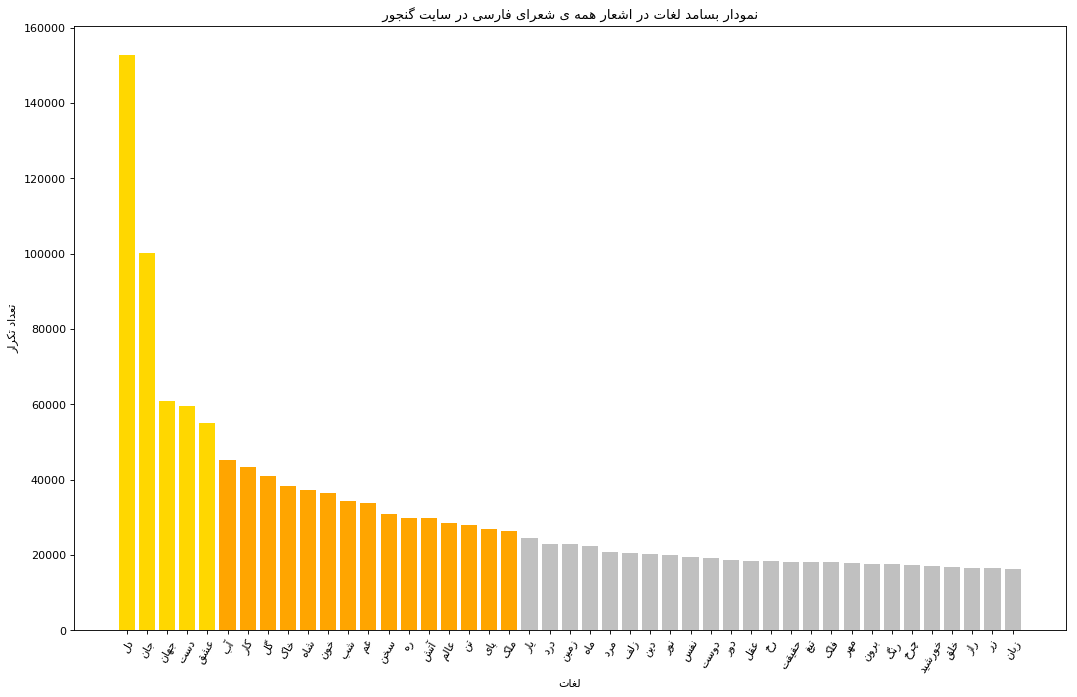

In [36]:
do_them_all('poets_all.txt','stop_words.txt', ' همه ی شعرای فارسی در سایت گنجور ')

## Observation on all Poems:

These are the top 15 words in all of the Persian Poems:

1- ``Heart`` is repeated around 150 K times.

2- ``Spirit`` is repeated around 100 K times (notice the top runner is 2/3 of the top, very meaningful difference, also notice 7K of this word comes from Rumi's poems).

3- ``World`` is repeated around 60 K times.

4- ``Hand`` (again suprisingly) is repeated around 60 K times.

5- ``Love`` is repeated around 55K times.

6- ``Water`` is repeated around 45 K times.

7- ``Action (job)`` is repeated around 40 K times.

8- ``Flower`` is repeated around 40 K times.

9- ``Soil`` is repeated around 40 K times.

10- ``King`` is repeated around 38 K times (remember around 4K of which is from Ferdowsi).

11- ``Blood`` is repeated around 38 K times.

12- ``Night`` is repeated around 37 K times.

13- ``Sorrow`` is repeated around 37 K times.

14- ``Speech`` is repeated around 30 K times

15- ``Road`` is repeated around 30K times.